In [1]:
import pandas_datareader as pdr

In [3]:
df=pdr.get_data_tiingo('AAPL',api_key=key)

C:\Users\Merry supriya\AppData\Local\Temp\ipykernel_10608\2203299146.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df=pdr.get_data_tiingo('AAPL',api_key=key)


In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-06-07 00:00:00+00:00,193.46,194.20,192.34,194.14,21347180,46.217341,46.394126,45.949775,46.379792,85388720,0.0,1.0
1,AAPL,2018-06-08 00:00:00+00:00,191.70,192.00,189.77,191.17,26656799,45.796879,45.868549,45.335805,45.670263,106627196,0.0,1.0
2,AAPL,2018-06-11 00:00:00+00:00,191.23,191.97,190.21,191.35,18308460,45.684597,45.861382,45.440920,45.713265,73233840,0.0,1.0
3,AAPL,2018-06-12 00:00:00+00:00,192.28,192.61,191.15,191.39,16911141,45.935441,46.014277,45.665485,45.722821,67644564,0.0,1.0
4,AAPL,2018-06-13 00:00:00+00:00,190.70,192.88,190.44,192.42,21638393,45.557981,46.078780,45.495867,45.968886,86553572,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-05-30 00:00:00+00:00,177.30,178.990,176.5700,176.960,55964401,177.30,178.990,176.5700,176.960,55964401,0.0,1.0
1253,AAPL,2023-05-31 00:00:00+00:00,177.25,179.350,176.7600,177.325,99313268,177.25,179.350,176.7600,177.325,99313268,0.0,1.0
1254,AAPL,2023-06-01 00:00:00+00:00,180.09,180.120,176.9306,177.700,68901809,180.09,180.120,176.9306,177.700,68901809,0.0,1.0
1255,AAPL,2023-06-02 00:00:00+00:00,180.95,181.780,179.2600,181.030,61996913,180.95,181.780,179.2600,181.030,61996913,0.0,1.0
1256,AAPL,2023-06-05 00:00:00+00:00,179.58,184.951,178.0350,182.630,121946497,179.58,184.951,178.0350,182.630,121946497,0.0,1.0


In [9]:
df1=df.reset_index()['close']

In [10]:
df1.shape

(1257,)

In [11]:
df1

0       193.46
1       191.70
2       191.23
3       192.28
4       190.70
         ...  
1252    177.30
1253    177.25
1254    180.09
1255    180.95
1256    179.58
Name: close, Length: 1257, dtype: float64

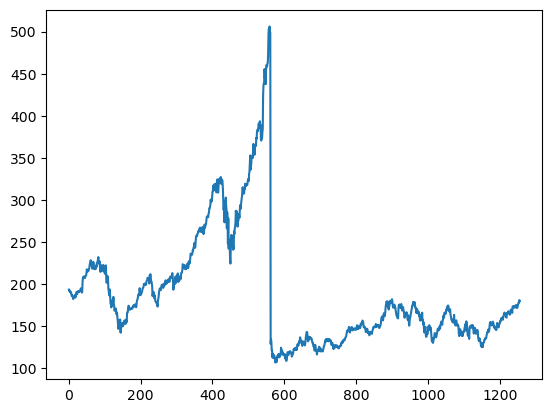

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [13]:
### LSTM are sensitive to the scale of the data. so we apply Minmax scaler

In [14]:
import numpy as np

In [15]:
df1

0       193.46
1       191.70
2       191.23
3       192.28
4       190.70
         ...  
1252    177.30
1253    177.25
1254    180.09
1255    180.95
1256    179.58
Name: close, Length: 1257, dtype: float64

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
df1.shape

(1257, 1)

In [18]:
df1

array([[0.21695679],
       [0.21254853],
       [0.21137132],
       ...,
       [0.183469  ],
       [0.18562304],
       [0.18219161]])

In [19]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size,test_size

(817, 440)

In [21]:
train_data

array([[2.16956794e-01],
       [2.12548528e-01],
       [2.11371321e-01],
       [2.14001252e-01],
       [2.10043832e-01],
       [2.10294302e-01],
       [2.05385097e-01],
       [2.05134627e-01],
       [1.97495304e-01],
       [1.99524108e-01],
       [1.96919224e-01],
       [1.95566688e-01],
       [1.88678773e-01],
       [1.94339386e-01],
       [1.93663118e-01],
       [1.97019411e-01],
       [1.96042580e-01],
       [2.01227301e-01],
       [1.93061991e-01],
       [1.96768942e-01],
       [2.03206011e-01],
       [2.09743269e-01],
       [2.09167188e-01],
       [2.02980589e-01],
       [2.10870382e-01],
       [2.11621791e-01],
       [2.10569818e-01],
       [2.11922354e-01],
       [2.09292423e-01],
       [2.12999374e-01],
       [2.11897307e-01],
       [2.12323106e-01],
       [2.15804634e-01],
       [2.20363181e-01],
       [2.18835316e-01],
       [2.10745147e-01],
       [2.08065122e-01],
       [2.09016907e-01],
       [2.37094552e-01],
       [2.51847214e-01],


In [22]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [23]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [24]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [25]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [26]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 240ms/step - loss: 0.0375 - val_loss: 5.4760e-04
Epoch 2/100
12/12 [==============================] - 2s 145ms/step - loss: 0.0165 - val_loss: 0.0056
Epoch 3/100
12/12 [==============================] - 2s 148ms/step - loss: 0.0109 - val_loss: 6.2172e-04
Epoch 4/100
12/12 [==============================] - 2s 151ms/step - loss: 0.0091 - val_loss: 4.8517e-04
Epoch 5/100
12/12 [==============================] - 2s 149ms/step - loss: 0.0093 - val_loss: 0.0019
Epoch 6/100
12/12 [==============================] - 2s 150ms/step - loss: 0.0099 - val_loss: 3.9652e-04
Epoch 7/100
12/12 [==============================] - 2s 150ms/step - loss: 0.0080 - val_loss: 2.8534e-04
Epoch 8/100
12/12 [==============================] - 2s 150ms/step - loss: 0.0067 - val_loss: 3.8909e-04
Epoch 9/100
12/12 [==============================] - 2s 151ms/step - loss: 0.0054 - val_loss: 2.9378e-04
Epoch 10/100
12/12 [==============================] - 2s 153ms/

In [44]:
import tensorflow as tf

In [45]:
tf.__version__

'2.12.0'

In [46]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 36ms/step


In [47]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [48]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

222.47615109452133

In [49]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

154.8547683631275

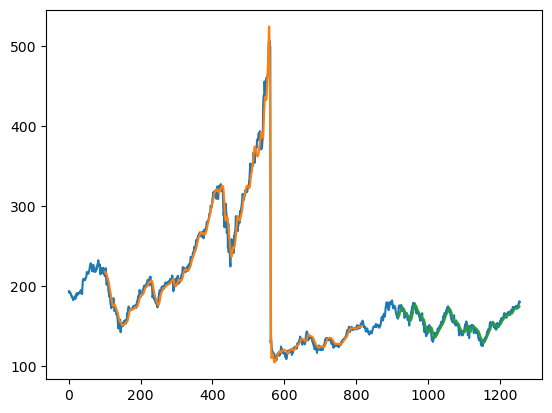

In [50]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [51]:
len(test_data)

440

In [52]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [53]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [54]:
temp_input

[0.0665497808390732,
 0.0699311208515967,
 0.0728866624921728,
 0.07105823418910456,
 0.07120851596743893,
 0.07772072636192856,
 0.08583594239198494,
 0.08939261114589853,
 0.08771446462116467,
 0.09297432686286783,
 0.09790857858484658,
 0.09056981840951783,
 0.0938008766437069,
 0.09665623043206006,
 0.11015654351909826,
 0.11937382592360674,
 0.1124358171571696,
 0.11974953036944269,
 0.11291170945522849,
 0.11028177833437691,
 0.1106324358171571,
 0.11774577332498432,
 0.11611772072636184,
 0.12145272385723233,
 0.11739511584220413,
 0.11448966812773947,
 0.10429555416405756,
 0.10537257357545393,
 0.10659987476518468,
 0.09986224170319347,
 0.10289292423293667,
 0.10161552911709448,
 0.09635566687539132,
 0.09785848465873509,
 0.11068252974326859,
 0.11769567939887288,
 0.11211020663744514,
 0.11529117094552283,
 0.1095804633688165,
 0.10434564809016905,
 0.10927989981214775,
 0.11458985597996241,
 0.11559173450219157,
 0.12275516593613017,
 0.1206261740763932,
 0.126637445209768

In [58]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.17463768]
101
1 day input [0.06993112 0.07288666 0.07105823 0.07120852 0.07772073 0.08583594
 0.08939261 0.08771446 0.09297433 0.09790858 0.09056982 0.09380088
 0.09665623 0.11015654 0.11937383 0.11243582 0.11974953 0.11291171
 0.11028178 0.11063244 0.11774577 0.11611772 0.12145272 0.11739512
 0.11448967 0.10429555 0.10537257 0.10659987 0.09986224 0.10289292
 0.10161553 0.09635567 0.09785848 0.11068253 0.11769568 0.11211021
 0.11529117 0.10958046 0.10434565 0.1092799  0.11458986 0.11559173
 0.12275517 0.12062617 0.12663745 0.13134627 0.12771446 0.13046963
 0.13377583 0.12884158 0.12726362 0.13507827 0.13906074 0.14542267
 0.14860363 0.1472511  0.14256731 0.14482154 0.13823419 0.13515341
 0.13340013 0.14707577 0.14619912 0.14624922 0.14935504 0.15226049
 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415
 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838
 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134
 0.16338134 0.16493425 0.17084534

In [59]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [60]:
import matplotlib.pyplot as plt

In [61]:
len(df1)

1257

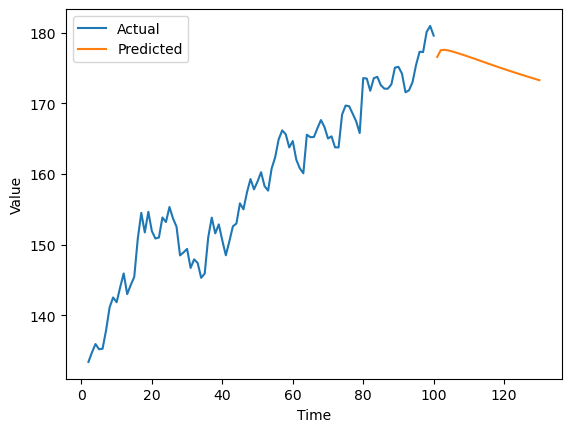

In [67]:
import matplotlib.pyplot as plt

# Plot the actual values
plt.plot(day_new[1:], scaler.inverse_transform(df1[1158:]))

# Plot the predicted values
plt.plot(day_pred, scaler.inverse_transform(lst_output))

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Actual', 'Predicted'])

# Show the plot
plt.show()


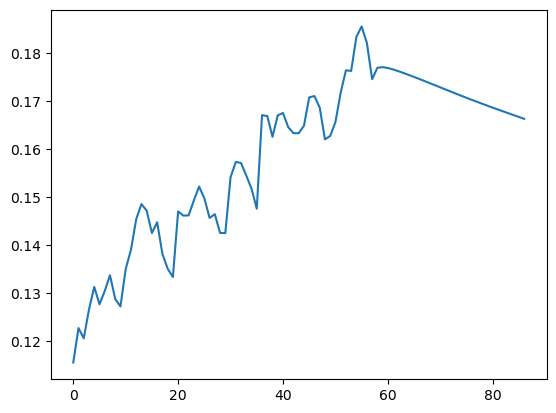

In [68]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [69]:
df3=scaler.inverse_transform(df3).tolist()

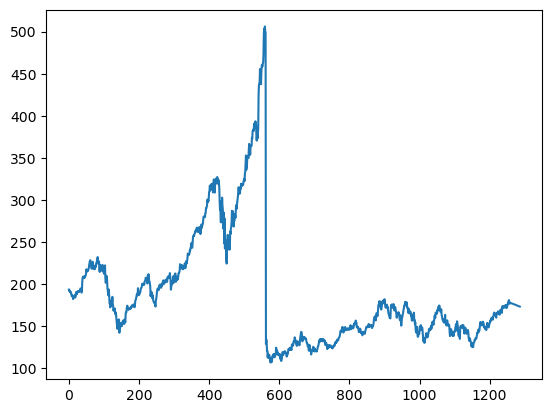

In [70]:
plt.plot(df3)